In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("notebook")
plt.rcParams["figure.figsize"] = (15,6)

In [2]:
import sqlite3
con = sqlite3.connect('app.db')
acc_df = pd.read_sql('select * from account', con, index_col='id')
agent_df = pd.read_sql('select * from agent', con, index_col='id')
cat_df = pd.read_sql('select * from category', con, index_col='id')
cur_df = pd.read_sql('select * from currency', con, index_col='id')
tr_df = pd.read_sql('select * from trans', con, index_col='id')

In [3]:
tr_df['date_issued'] = pd.to_datetime(tr_df['date_issued'], format="%Y-%m-%d %H:%M:%S.%f")
acc_df['date_created'] = pd.to_datetime(acc_df['date_created'], format="%Y-%m-%d %H:%M:%S.%f")
tr_df['time'] = tr_df['date_issued'].dt.hour * 60 + tr_df['date_issued'].dt.minute
tr_df['category'] = tr_df.category_id.map(cat_df.desc)
tr_df['account'] = tr_df.account_id.map(acc_df.desc)
tr_df['currency'] = tr_df.account_id.map(acc_df.currency_id).map(cur_df.code)
tr_df['agent'] = tr_df.agent_id.map(agent_df.desc)

In [4]:
analysis_sql_p = "app/static/sql/analysis.sql"
with open(analysis_sql_p, "r") as f:
    sql = ''.join(f.readlines())
    analysis = pd.read_sql_query(sql, con, params={'cid':0}, parse_dates=['date_issued'])

analysis['time'] = analysis['date_issued'].dt.hour * 60 + analysis['date_issued'].dt.minute
analysis['is_expense'] = analysis['is_expense'].apply(lambda x: x == 1)
analysis

,amount,date_issued,is_expense,cat_id,category,agent_id,agent,comment,currency,account_id,account,time
0,40.00,2019-08-07 17:15:00,True,7,Eating Out,1,Hiltl,Hiltl mit Jau,CHF,2,Jugendprivatkonto STU-Card,1035
1,9.50,2019-08-14 15:20:00,True,12,Usgang,2,Coop City Bellevue,Rahmbläserkapseln,CHF,2,Jugendprivatkonto STU-Card,920
2,8.85,2019-08-14 15:30:00,True,7,Eating Out,3,Coop Stadelhofen,Zmittag nach Ferienplausch mit Jaù i think,CHF,2,Jugendprivatkonto STU-Card,930
3,4.40,2019-08-16 20:00:00,True,4,Transportation,4,SBB Wetzikon,Zurück von Berglauf,CHF,2,Jugendprivatkonto STU-Card,1200
4,10.35,2019-08-16 20:30:00,True,7,Eating Out,3,Coop Stadelhofen,Znacht auf Sächsilüteplatz nach Berglauf,CHF,2,Jugendprivatkonto STU-Card,1230
...,...,...,...,...,...,...,...,...,...,...,...,...
1083,3.65,2021-06-12 12:25:00,True,6,Lebensmittel,539,Bäckerei Hug Bahnhof Oerlikon,,CHF,2,Jugendprivatkonto STU-Card,745
1084,5.90,2021-06-12 12:55:00,True,6,Lebensmittel,494,Panorama Brot Oerlikon,"toogoodtogo, zspat gange, nix gekriegt :/",CHF,3,ZKB Prepaid Mastercard,775
1085,9.90,2021-06-12 12:56:00,True,7,Eating Out,540,SimSim Oerlikon,toogoodtogo,CHF,3,ZKB Prepaid Mastercard,776
1086,39.00,2021-06-12 14:24:00,True,7,Eating Out,541,House of Momos,Momos während YES,CHF,1,Bargeld CHF,864


In [5]:
unique = list(analysis.category.unique())

l = len(unique)
colors = sns.color_palette([list(sns.color_palette("bright", 10))[i] for i in [0, 1, 3, 4, 9]][:min(5, l)]
         + list(sns.color_palette("colorblind", 10))[:min(max(0, l-5), 10)]
         + list(sns.color_palette("husl", max(0, l-15)))[:max(0, l-15)])
display(colors)
print(len(colors))
unique = sorted(unique, key=lambda c: analysis.category.value_counts()[c], reverse=True)
print(", ".join(unique))
colors = dict(zip(unique, colors))

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.0, 0.8431372549019608, 1.0),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522)]

20
Snacks, Eating Out, Transportation, Lebensmittel, Usgang, Miscellaneous, Gifts, Lohn, Personal, Lodging, Sport, Entertainment, Clothes, Health, Unrecorded, Education, Hygiene, Rent, Kinderlohn, Taxes


In [6]:
import viz

In [7]:
viz.overview.month_overview(analysis, "06.21", palette=colors)

In [11]:
viz.overview.overview(viz.select.select(analysis), 'CHF', palette=colors)

In [9]:
viz.overview.overview(viz.select.select(analysis, currency='JPY'), 'JPY', lim=5000, palette=colors)

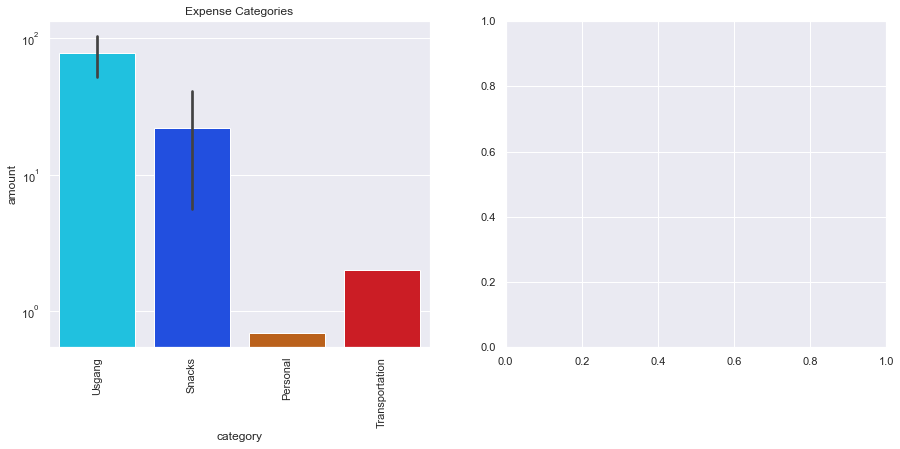

In [10]:
viz.overview.overview(viz.select.select(analysis, currency='EUR'), 'EUR', palette=colors)

In [11]:
viz.select.select(analysis, exp=True).groupby('category')['amount'].sum()

category
Clothes           1469.25
Eating Out        1780.90
Education         3096.00
Entertainment       55.60
Gifts              515.50
Health             326.90
Hygiene            155.75
Lebensmittel      2830.07
Lodging            126.15
Miscellaneous      788.10
Personal          1909.87
Rent              5200.00
Snacks             300.70
Sport             1282.50
Taxes               72.00
Transportation    3238.30
Unrecorded          15.20
Usgang             896.90
Name: amount, dtype: float64

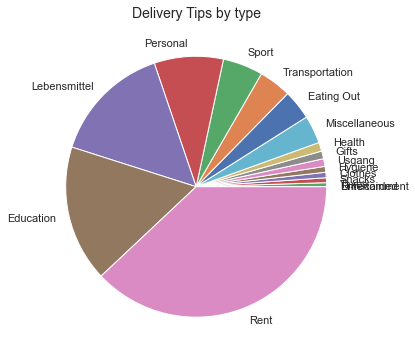

In [12]:
pie, ax = plt.subplots(figsize=[10,6])
sums = viz.select.select(analysis, exp=True, date_start="2020-12-01").groupby('category')['amount'].sum()
sums = sums[sums.index != "Kontoübertrag"].sort_values(axis=0)
plt.pie(x=sums, labels=sums.keys())
plt.title("Delivery Tips by type", fontsize=14);

In [13]:
print(viz.select.select(analysis, date_start="2020-01-01", categories=["Lohn"])["amount"].sum())
viz.select.select(analysis, date_start="2020-01-01", categories=["Lohn"])

13837.199999999999


,amount,date_issued,is_expense,cat_id,category,agent_id,agent,comment,currency,account_id,account,time
216,78.00,2020-01-07 14:05:00,False,1,Lohn,38,Yume-Ramen GmbH,Trinkgeld Dezember 19,CHF,1,Bargeld CHF,845
246,860.00,2020-01-20 00:00:00,False,1,Lohn,146,Stefano Stival,Röthlisberger Sideboard,CHF,2,Jugendprivatkonto STU-Card,0
277,1644.15,2020-02-05 00:00:00,False,1,Lohn,38,Yume-Ramen GmbH,"Januar 20, 75.68h",CHF,2,Jugendprivatkonto STU-Card,0
280,60.00,2020-02-08 17:00:00,False,1,Lohn,165,Rudi Manser,"Entgelt für Mo, 03.02.",CHF,1,Bargeld CHF,1020
422,140.00,2020-03-23 00:00:00,False,1,Lohn,384,Schweizer Skischule Luzern,,CHF,2,Jugendprivatkonto STU-Card,0
688,220.00,2020-06-10 20:00:00,False,1,Lohn,38,Yume-Ramen GmbH,Trinkgeld Januar,CHF,1,Bargeld CHF,1200
728,888.55,2020-07-06 00:00:00,False,1,Lohn,38,Yume-Ramen GmbH,"Juni 20, 39.72h",CHF,2,Jugendprivatkonto STU-Card,0
730,137.00,2020-07-07 20:30:00,False,1,Lohn,38,Yume-Ramen GmbH,"Trinkgeld, June 20",CHF,1,Bargeld CHF,1230
748,420.45,2020-07-27 00:00:00,False,1,Lohn,38,Yume-Ramen GmbH,Juli 20,CHF,2,Jugendprivatkonto STU-Card,0
771,51.00,2020-08-14 17:50:00,False,1,Lohn,38,Yume-Ramen GmbH,Trinkgeld July 20,CHF,1,Bargeld CHF,1070


In [14]:
spent = viz.select.select(analysis, date_start="2020-11-01", categories=["Lebensmittel", "Eating Out", "Snacks"])["amount"].sum()

In [15]:
day = spent / (dt.datetime.now() - dt.datetime.strptime("2020-11-01", "%Y-%m-%d")).days

In [16]:
day * 365.25 / 12

313.5497321428572

In [17]:
changes_sql_p = "app/static/sql/changes.sql"
with open(changes_sql_p, "r") as f:
    sql = ''.join(f.readlines())
    changes = pd.read_sql_query(sql, con, params={'id':2}, parse_dates=['date_issued'])
    
changes

,id,amount,is_expense,agent_id,agent_desc,date_issued,cat_id,direct_flow_in,comment
0,1,40.00,1,1,Hiltl,2019-08-07 17:15:00,7.0,NaN,Hiltl mit Jau
1,2,9.50,1,2,Coop City Bellevue,2019-08-14 15:20:00,12.0,NaN,Rahmbläserkapseln
2,3,8.85,1,3,Coop Stadelhofen,2019-08-14 15:30:00,7.0,NaN,Zmittag nach Ferienplausch mit Jaù i think
3,4,4.40,1,4,SBB Wetzikon,2019-08-16 20:00:00,4.0,NaN,Zurück von Berglauf
4,5,10.35,1,3,Coop Stadelhofen,2019-08-16 20:30:00,7.0,NaN,Znacht auf Sächsilüteplatz nach Berglauf
...,...,...,...,...,...,...,...,...,...
660,1245,3.10,1,167,SBB online,2021-06-08 17:14:00,4.0,NaN,zu Omi
661,1246,6.20,1,458,Mensa Polyterasse,2021-06-09 12:14:00,7.0,NaN,
662,1247,16.70,1,538,Denner Express Josefstrasse / Langstrasse,2021-06-11 22:02:00,12.0,NaN,
663,1249,0.90,1,26,Migros HB Landesmuseum,2021-06-12 08:37:00,8.0,NaN,


In [18]:
analysis_sql_p = "app/static/sql/analysis.sql"
with open(analysis_sql_p, "r") as f:
    sql = ''.join(f.readlines())
    analysis = pd.read_sql_query(sql, con, params={'cid':1}, parse_dates=['date_issued'])
    
analysis

,amount,date_issued,is_expense,cat_id,category,agent_id,agent,comment,currency,account_id,account
0,40.00,2019-08-07 17:15:00,1.0,7,Eating Out,1,Hiltl,Hiltl mit Jau,CHF,2,Jugendprivatkonto STU-Card
1,9.50,2019-08-14 15:20:00,1.0,12,Usgang,2,Coop City Bellevue,Rahmbläserkapseln,CHF,2,Jugendprivatkonto STU-Card
2,8.85,2019-08-14 15:30:00,1.0,7,Eating Out,3,Coop Stadelhofen,Zmittag nach Ferienplausch mit Jaù i think,CHF,2,Jugendprivatkonto STU-Card
3,4.40,2019-08-16 20:00:00,1.0,4,Transportation,4,SBB Wetzikon,Zurück von Berglauf,CHF,2,Jugendprivatkonto STU-Card
4,10.35,2019-08-16 20:30:00,1.0,7,Eating Out,3,Coop Stadelhofen,Znacht auf Sächsilüteplatz nach Berglauf,CHF,2,Jugendprivatkonto STU-Card
...,...,...,...,...,...,...,...,...,...,...,...
746,16.70,2021-06-11 22:02:00,1.0,12,Usgang,538,Denner Express Josefstrasse / Langstrasse,,CHF,2,Jugendprivatkonto STU-Card
747,0.90,2021-06-12 08:37:00,1.0,8,Snacks,26,Migros HB Landesmuseum,,CHF,2,Jugendprivatkonto STU-Card
748,3.65,2021-06-12 12:25:00,1.0,6,Lebensmittel,539,Bäckerei Hug Bahnhof Oerlikon,,CHF,2,Jugendprivatkonto STU-Card
749,5.90,2021-06-12 12:55:00,1.0,6,Lebensmittel,494,Panorama Brot Oerlikon,"toogoodtogo, zspat gange, nix gekriegt :/",CHF,3,ZKB Prepaid Mastercard
